# load package

In [ ]:
##import package
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


# load and view set

In [49]:
training = pd.read_csv("train.csv")
testing = pd.read_csv("test.csv")

In [50]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [51]:
testing.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [52]:
print(training.keys())
print(testing.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


# dealing with NaN Values (Imputation)

In [53]:
def null_table(training, testing):
    print("Training Data Frame")
    print(pd.isnull(training).sum())
    print(" ")
    print("Testing Data Frame")
    print(pd.isnull(testing).sum())
    
null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [54]:
training.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)
testing.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)

In [55]:
null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


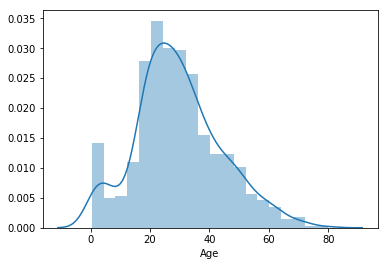

In [60]:
# check the distribution of the Age
copy = training.copy()
copy.dropna(inplace = True)
sns.distplot(copy["Age"])
sns.distplot?

In [61]:
copy.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [62]:
training["Age"].fillna(training["Age"].median, inplace = True)

In [64]:
testing["Age"].fillna(testing["Age"].median, inplace = True)

In [67]:
null_table(training, testing)

Training Data Frame
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64
 
Testing Data Frame
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64


In [72]:
training["Embarked"].fillna("S", inplace = True)
testing["Fare"].fillna(testing["Fare"].median, inplace = True)

In [74]:
null_table(training, testing)

Training Data Frame
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
 
Testing Data Frame
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


# plotting and Visuaiazing Data

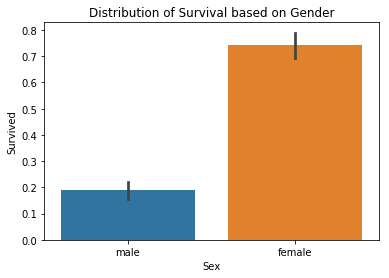

In [93]:
# Gender

sns.barplot(x = "Sex", y = "Survived", data = training)
plt.title("Distribution of Survival based on Gender")


total_survived_females = training[training.Sex == 'female'].Survived.sum()
total_survived_males = training[training.Sex == 'male'].Survived.sum()

In [97]:
print("Total people survived is " + str(total_survived_females + total_survived_males))
print("Total people survived femal is " + str(total_survived_females))
print("Total people survived male is " + str(total_survived_males))

Total people survived is 342
Total people survived femal is 233
Total people survived male is 109


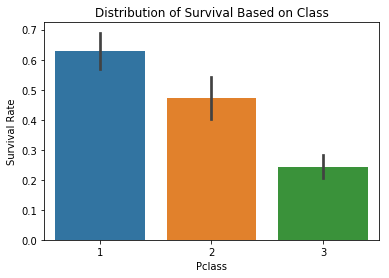

In [102]:
# Class
sns.barplot(x='Pclass', y = "Survived", data = training)
plt.ylabel("Survival Rate")
plt.title("Distribution of Survival Based on Class")
plt.show()

In [106]:
total_survived_firstClass = training[training.Pclass == 1].Survived.sum()
total_survived_secondClass = training[training.Pclass == 2].Survived.sum()
total_survived_thirdClass = training[training.Pclass == 3].Survived.sum()

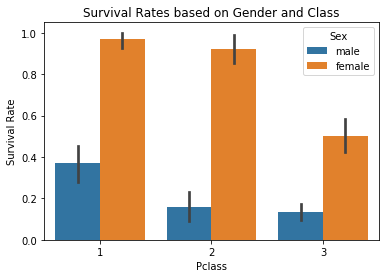

In [110]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=training)
plt.ylabel("Survival Rate")
plt.title("Survival Rates based on Gender and Class")
plt.show()